# 05b Label transfer from scRNA-seq
<b> Bart Theeuwes </b>

labels are transferred from scRNA-seq by using Seurat's FindTransferAnchors, comparing expression counts of scRNA-seq with GeneScores of scATAC-seq. Additionally, the gene expression data of the nearest cell in the scRNA-seq data is assigned to each scATAC-seq, creating a GeneIntegrationMatrix which can be used to identify markers of each cluster. 

In this analysis, we run label transfer seperately per stage as this is found to improve results. Additionally, this code reclusters cells per stage in order to get higher resolution 'stage_clusters' which are used downstream.

In [1]:
here::i_am("01_create_arrow.R")
source(here::here("settings.R"))
source(here::here("load_archr.R"))

here() starts at /rds/project/rds-SDzz0CATGms/users/bt392/04_rabbit_scATAC/code

Setting default number of Parallel threads to 1.

Setting addArchRVerbose = FALSE

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==

In [2]:
addArchRThreads(threads = 1) 

Setting default number of Parallel threads to 1.



#### Per stage label transfer

In [3]:
# Mapping scATAC-seq to scRNA-seq, this step takes a while as it is reran for each stage
Mapping_matrix('PeakMatrix', dims=35, features=55000)

[1] "GD7"


Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Checking Inputs...

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8750
Number of edges: 366728

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7689
Number of communities: 19
Elapsed time: 0 seconds


Getting ImputeWeights

Length of unique values greater than palette, interpolating..



[1] "GD8"


Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Checking Inputs...

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8418
Number of edges: 403068

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8536
Number of communities: 18
Elapsed time: 0 seconds


Getting ImputeWeights

Length of unique values greater than palette, interpolating..



[1] "GD9_ExE"


Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Checking Inputs...

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1629
Number of edges: 80006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7290
Number of communities: 12
Elapsed time: 0 seconds


Getting ImputeWeights

Length of unique values greater than palette, interpolating..



[1] "GD9"


Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Checking Inputs...

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15285
Number of edges: 665549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8455
Number of communities: 25
Elapsed time: 1 seconds


1 singletons identified. 24 final clusters.

Getting ImputeWeights

Getting ImputeWeights

Length of unique values greater than palette, interpolating..

Length of unique values greater than palette, interpolating..

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-==============

class: ArchRProject 
outputDirectory: /rds/project/rds-SDzz0CATGms/users/bt392/04_rabbit_scATAC/ArchR/Project 
samples(8): rabbit_BGRGP1 rabbit_BGRGP2 ... rabbit_BGRGP7 rabbit_BGRGP8
sampleColData names(1): ArrowFiles
cellColData names(24): Sample TSSEnrichment ... stage_clusters cell
numberOfCells(1): 34082
medianTSS(1): 3.615
medianFrags(1): 33602

In [7]:
getAvailableMatrices(ArchRProject)

[1] "GeneIntegrationMatrix_PeakMatrix" "GeneScoreMatrix"                 
[3] "PeakMatrix"                       "TileMatrix"

#### Plotting UMAPs

In [1]:
here::i_am("01_create_arrow.R")
source(here::here("settings.R"))
source(here::here("load_archr.R"))

here() starts at /rds/project/rds-SDzz0CATGms/users/bt392/04_rabbit_scATAC/code

Setting default number of Parallel threads to 1.

Setting addArchRVerbose = FALSE

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==

In [6]:
## Plot celltype labels on UMAP
# Fetch UMAP coordinates
umap.dt <- getEmbedding(ArchRProject,paste0("UMAP_PeakMatrix")) %>%
  round(2) %>%
  as.data.table(keep.rownames = T) %>%
  setnames(c("cell","umap1","umap2"))

# Plot
sample_metadata = as.data.frame(getCellColData(ArchRProject))
to.plot <- umap.dt %>%
  merge(sample_metadata,by="cell")



plot = function(colors, save=TRUE){
    
    # Get labels at centre of group
    labels = to.plot[,list(median(umap1), median(umap2)), 
                                  by=colors] %>%
        setnames(c('V1', 'V2'), c('umap1', 'umap2'))

    plot = ggplot(to.plot, aes_string(x="umap1", y="umap2", color=colors)) +
        geom_point(size=1, alpha=0.6) + 
        ggrepel::geom_label_repel(data=labels, 
                                    aes_string('umap1', 'umap2', label=colors, color=colors), 
                                    max.overlaps=Inf,
                                    box.padding = 0.8, show.legend = FALSE) + # adds text labels
        theme_void() + 
        theme(legend.position='none')

    # Add colors to umap
    if(colors=='stage'){
        plot = plot + scale_color_manual(values=opts$stage.colors)
    }
    else if(colors=='predictedGroup_celltype_PeakMatrix'){
        plot = plot + scale_color_manual(values=opts$celltype_colours)
    }else{
        plot = plot + scale_color_manual(values = as.vector(c(ArchRPalettes[[3]],ArchRPalettes[[5]], ArchRPalettes[[8]],ArchRPalettes[[9]]))[1:length(unique(to.plot[[colors]]))]) 
    }
    # Save
    if(save){
    pdf(sprintf("%s/ATAC_supp_UMAP_%s.pdf",io$sup_figures, colors), width=15, height=11)
        print(plot)
    dev.off()
 
    }
    return(plot)
}


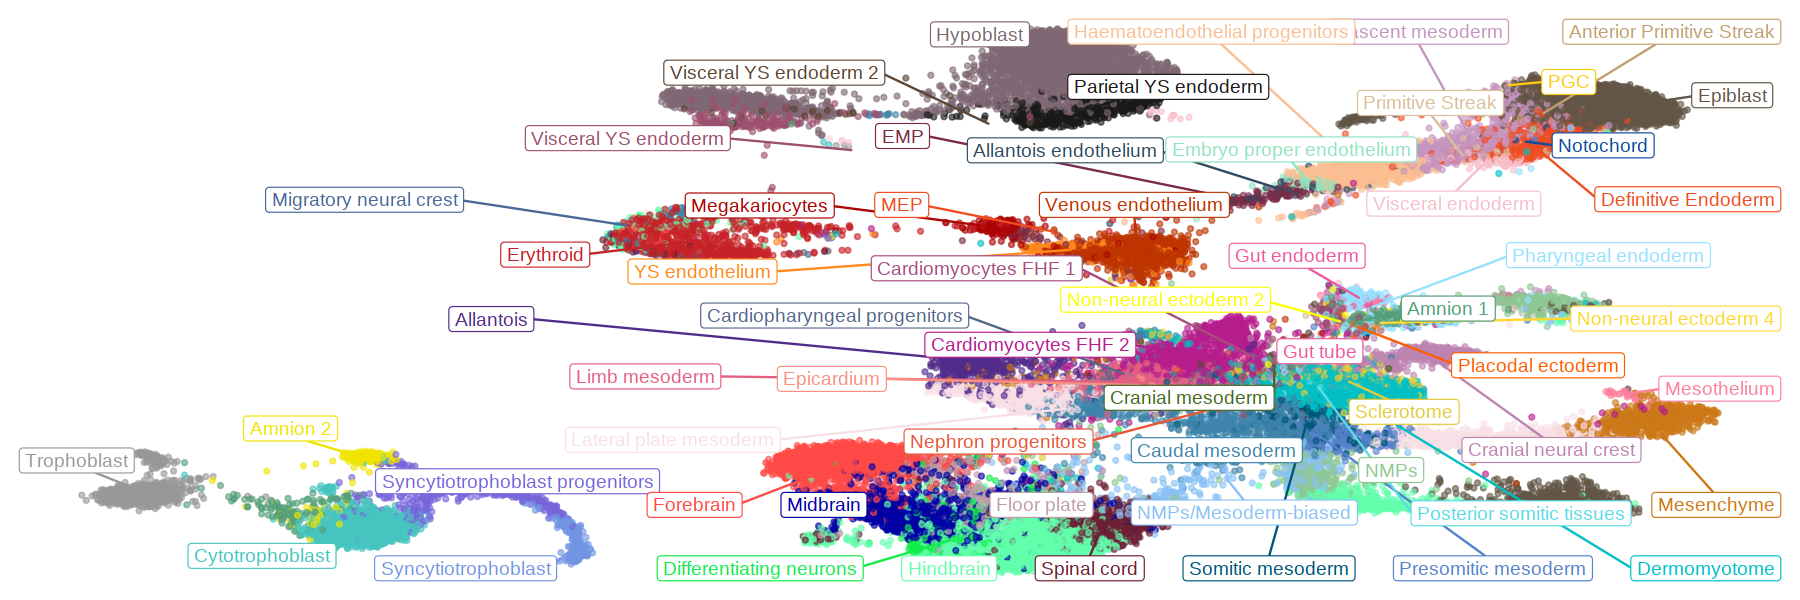

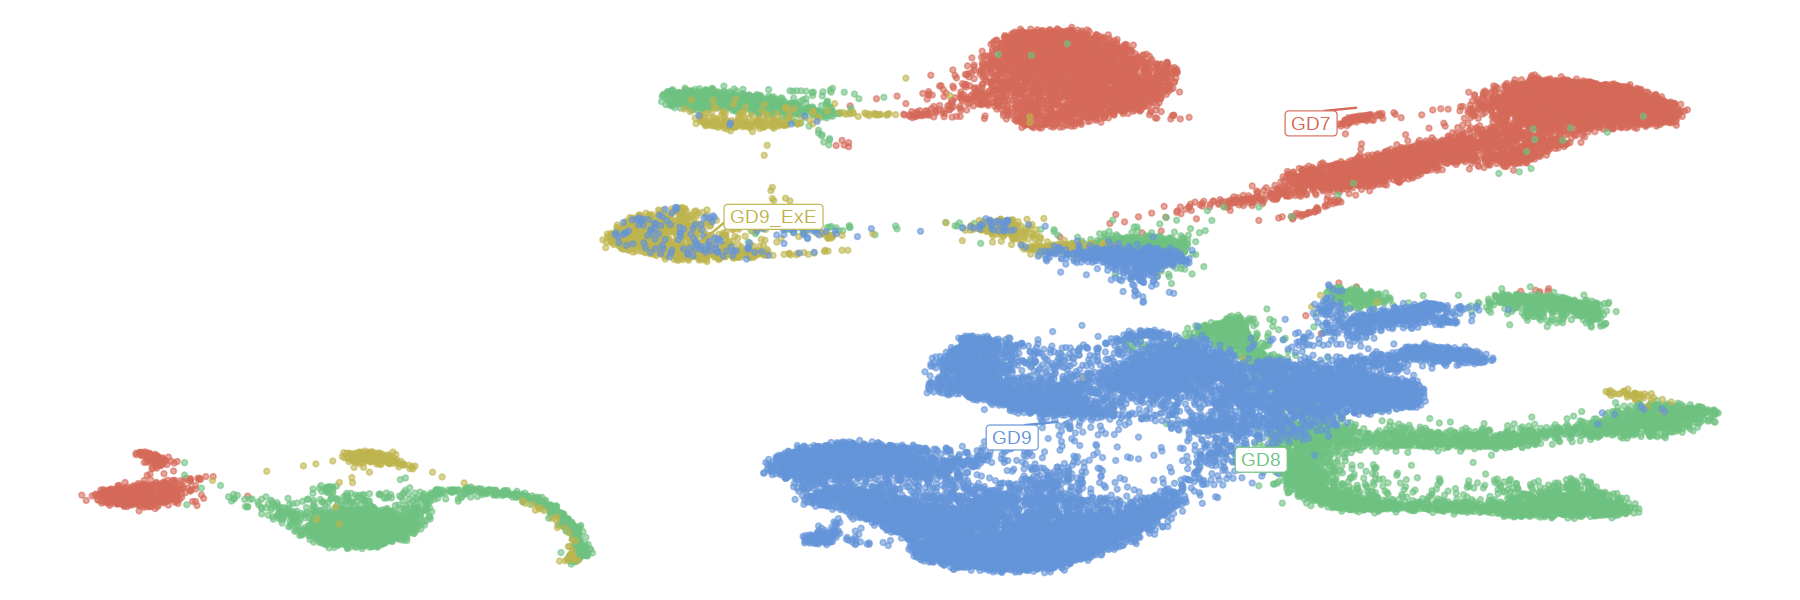

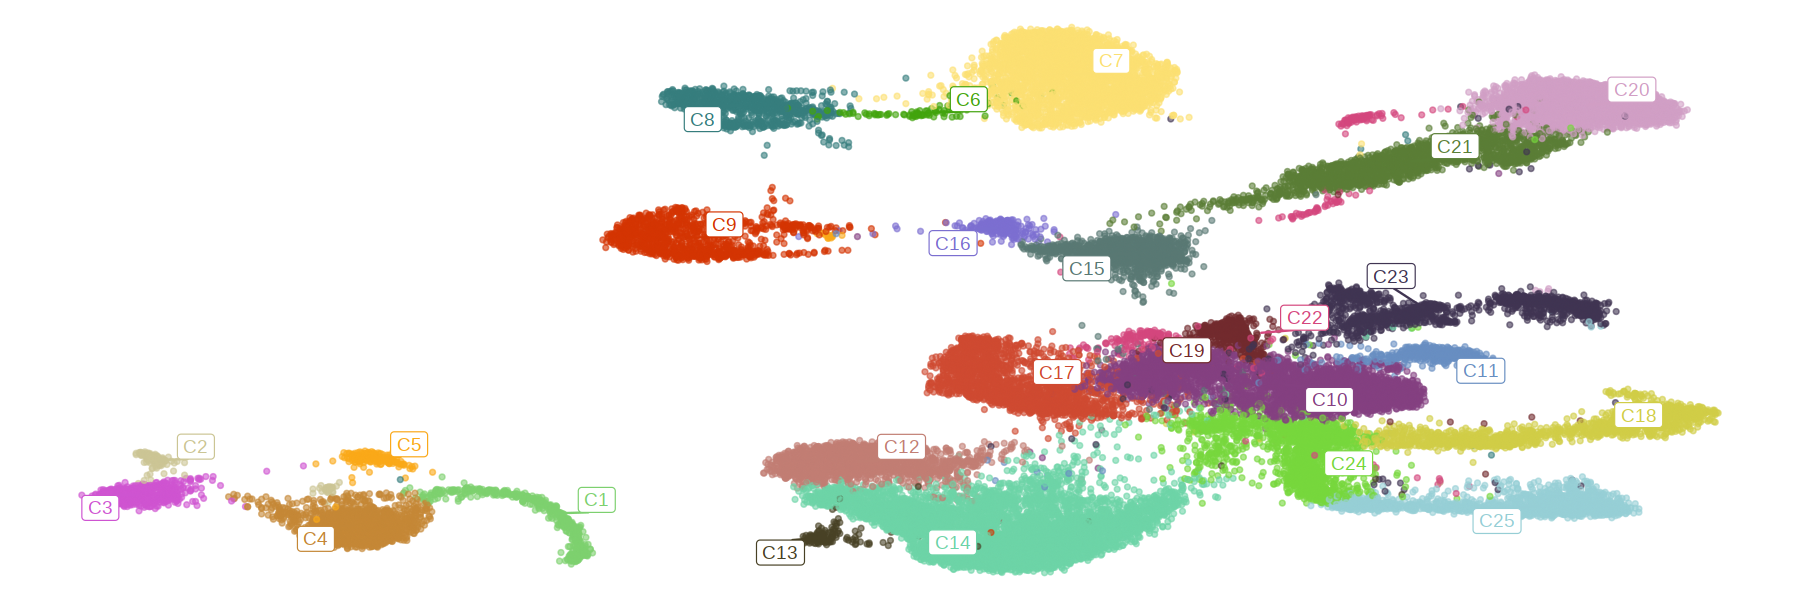

In [14]:
plot('predictedGroup_celltype_PeakMatrix')
plot('stage')
plot('Clusters_PeakMatrix')

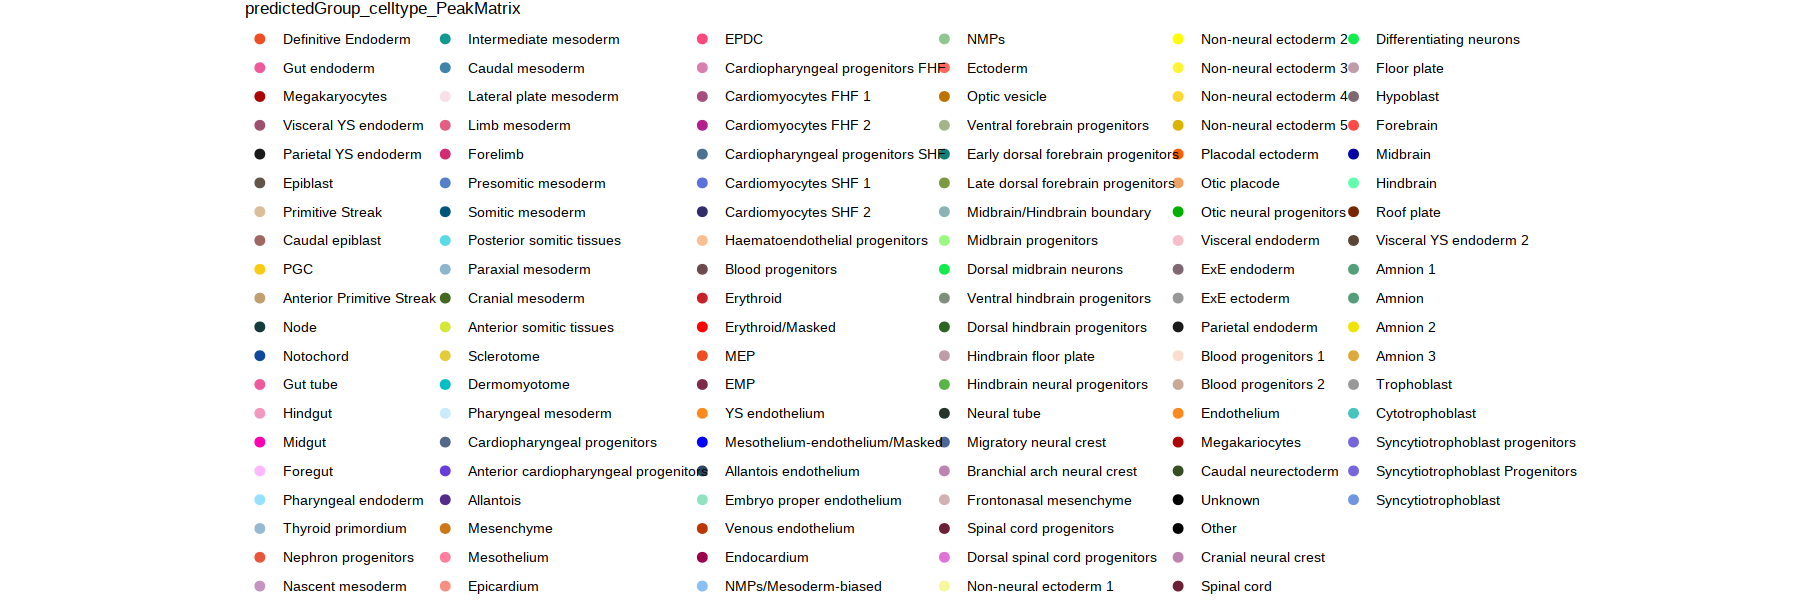

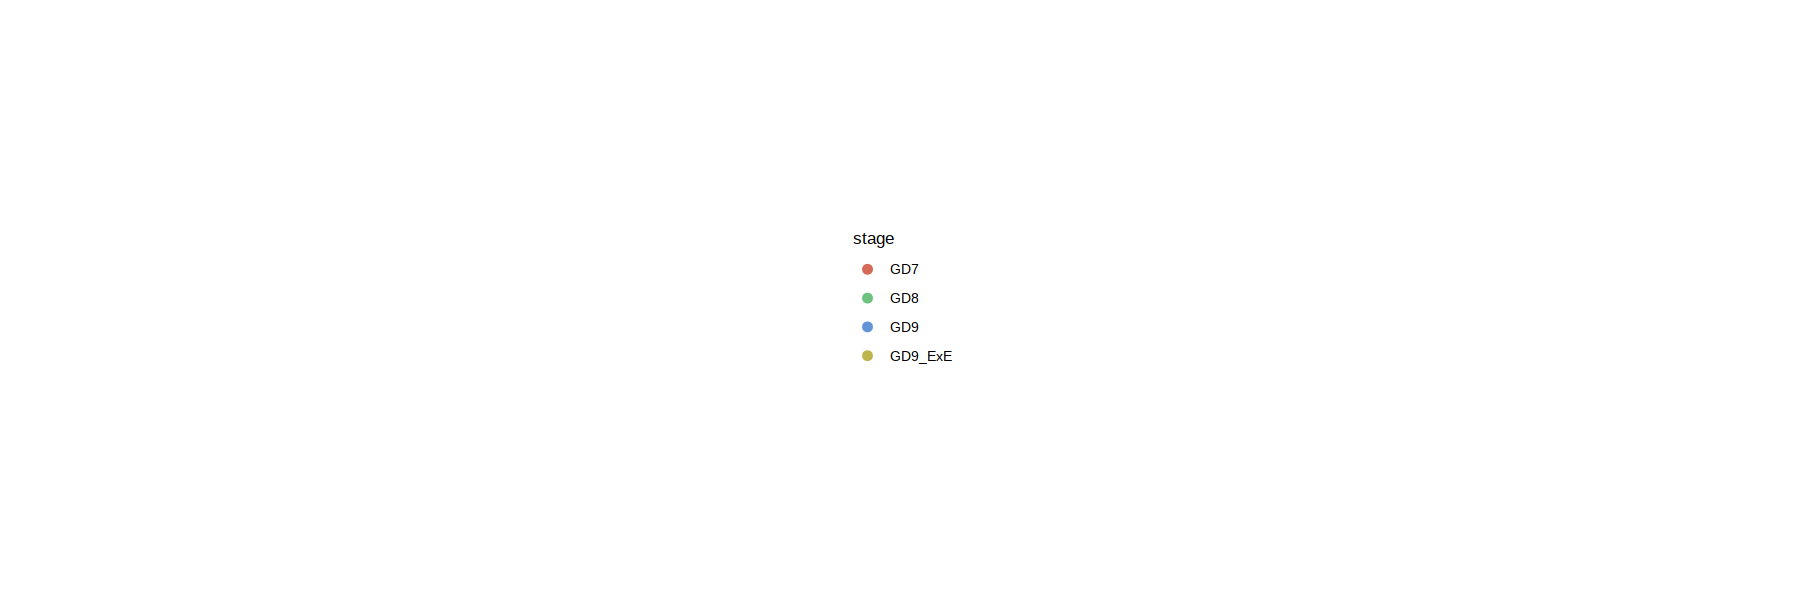

png 
  2

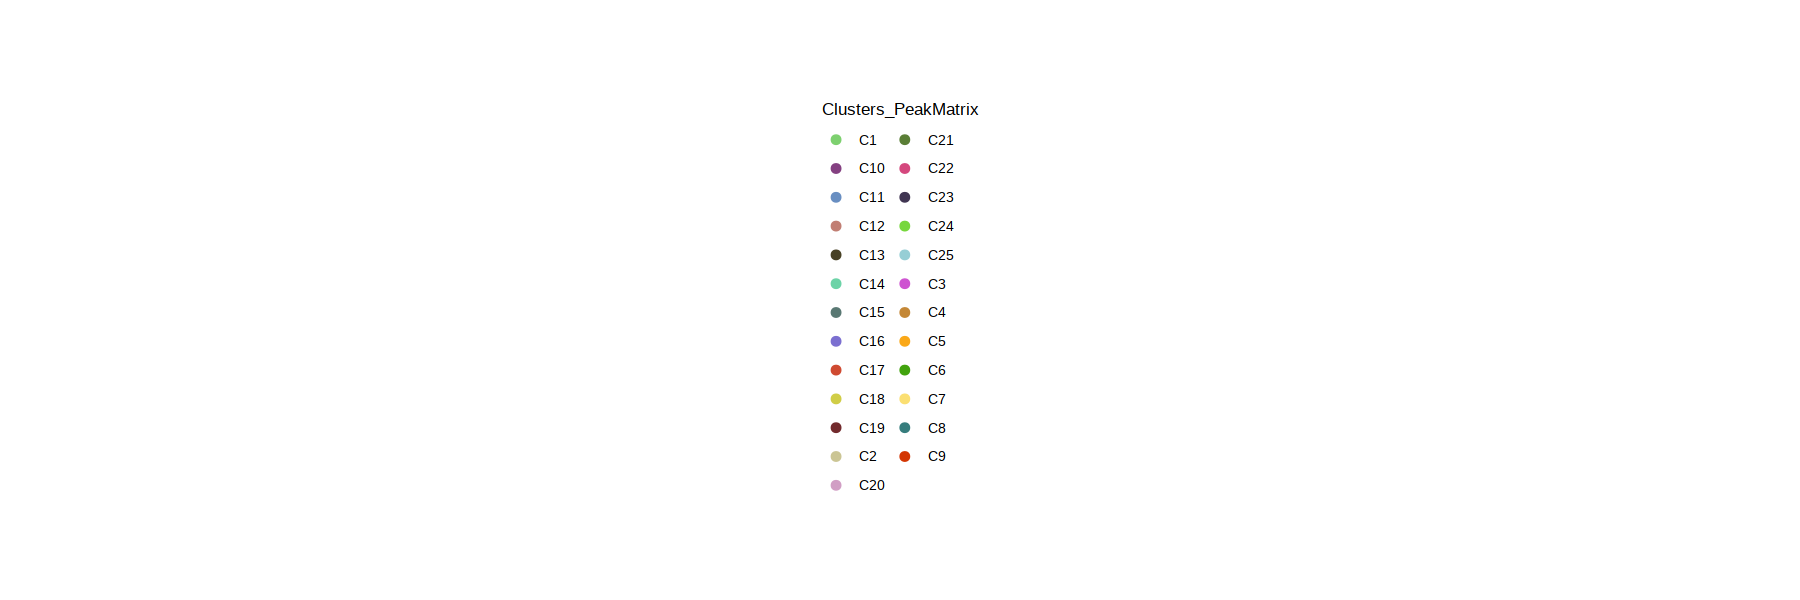

In [31]:
p1_legend = as_ggplot(get_legend(plot('predictedGroup_celltype_PeakMatrix', save=FALSE) +
                     geom_point(size=2) + 
                     theme(legend.position='right',
                          text=element_text(size=10))))
p1_legend
p2_legend = as_ggplot(get_legend(plot('stage', save=FALSE) +
                     geom_point(size=2) + 
                     theme(legend.position='right',
                          text=element_text(size=10))))
p2_legend
p3_legend = as_ggplot(get_legend(plot('Clusters_PeakMatrix', save=FALSE) +
                     geom_point(size=2) + 
                     theme(legend.position='right',
                          text=element_text(size=10)) ))#+ guides(col=guide_legend(nrow=2,byrow=TRUE))))
p3_legend
pdf(sprintf("%s/ATAC_supp_UMAP_legends.pdf",io$sup_figures), width=10, height=5)
    p1_legend
    p2_legend
    p3_legend
dev.off()

In [4]:
unique(sample_metadata$predictedGroup_celltype_PeakMatrix)

[1] "Hypoblast"                       "Haematoendothelial progenitors" 
 [3] "Nascent mesoderm"                "Epiblast"                       
 [5] "Trophoblast"                     "Visceral endoderm"              
 [7] "Primitive Streak"                "Parietal YS endoderm"           
 [9] "Definitive Endoderm"             "Allantois endothelium"          
[11] "Embryo proper endothelium"       "EMP"                            
[13] "Anterior Primitive Streak"       "Notochord"                      
[15] "PGC"                             "Venous endothelium"             
[17] "NMPs"                            "Syncytiotrophoblast"            
[19] "Hindbrain"                       "Cytotrophoblast"                
[21] "Lateral plate mesoderm"          "Cranial mesoderm"               
[23] "Syncytiotrophoblast progenitors" "Presomitic mesoderm"            
[25] "NMPs/Mesoderm-biased"            "Mesenchyme"                     
[27] "Gut endoderm"                    "Cardiomyocytes FHF 2"           
[29] "Pharyngeal endoderm"             "Amnion 1"                       
[31] "Erythroid"                       "Dermomyotome"                   
[33] "Somitic mesoderm"                "Amnion 2"                       
[35] "Cardiomyocytes FHF 1"            "MEP"                            
[37] "Caudal mesoderm"                 "Visceral YS endoderm"           
[39] "Cardiopharyngeal progenitors"    "YS endothelium"                 
[41] "Mesothelium"                     "Visceral YS endoderm 2"         
[43] "Megakariocytes"                  "Migratory neural crest"         
[45] "Cranial neural crest"            "Floor plate"                    
[47] "Spinal cord"                     "Forebrain"                      
[49] "Nephron progenitors"             "Midbrain"                       
[51] "Allantois"                       "Limb mesoderm"                  
[53] "Epicardium"                      "Non-neural ectoderm 2"          
[55] "Differentiating neurons"         "Sclerotome"                     
[57] "Posterior somitic tissues"       "Placodal ectoderm"              
[59] "Non-neural ectoderm 4"           "Gut tube"

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



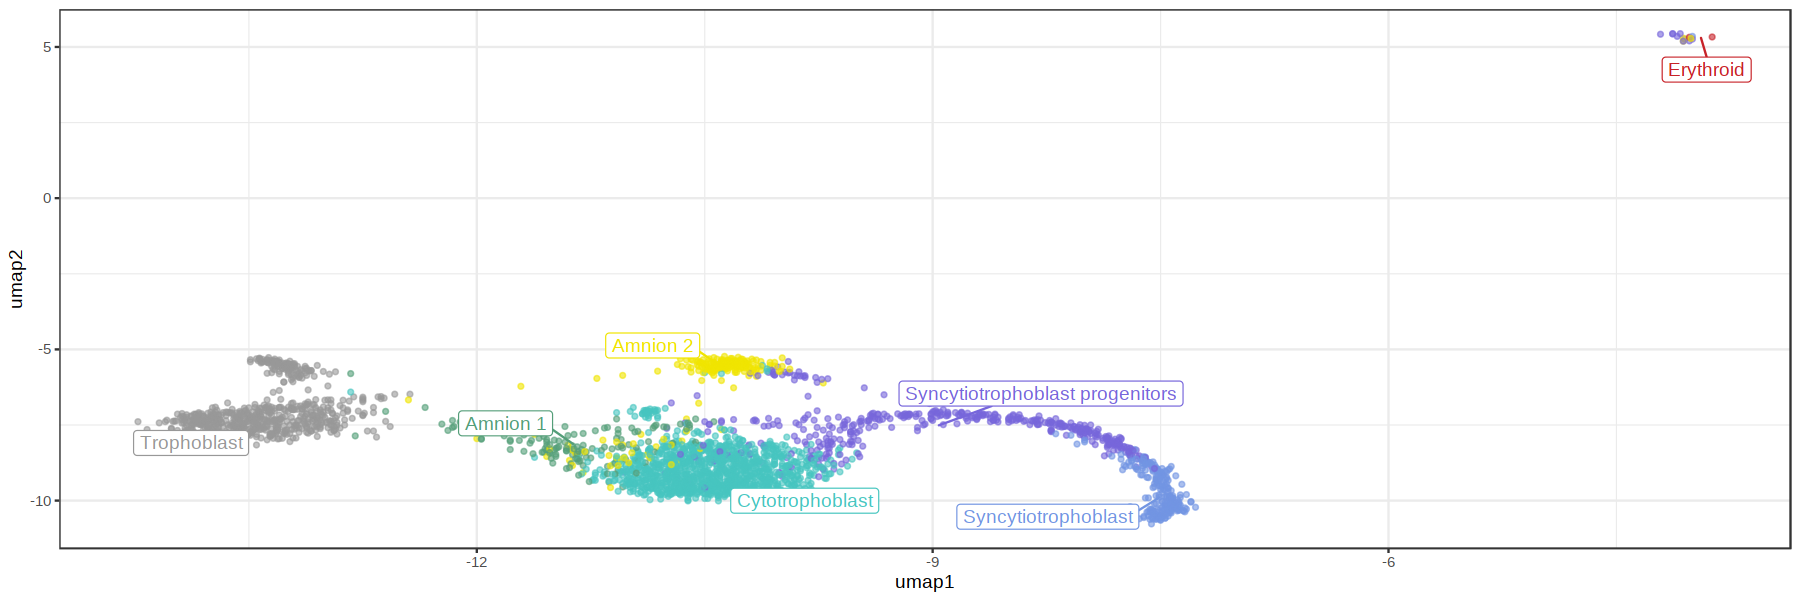

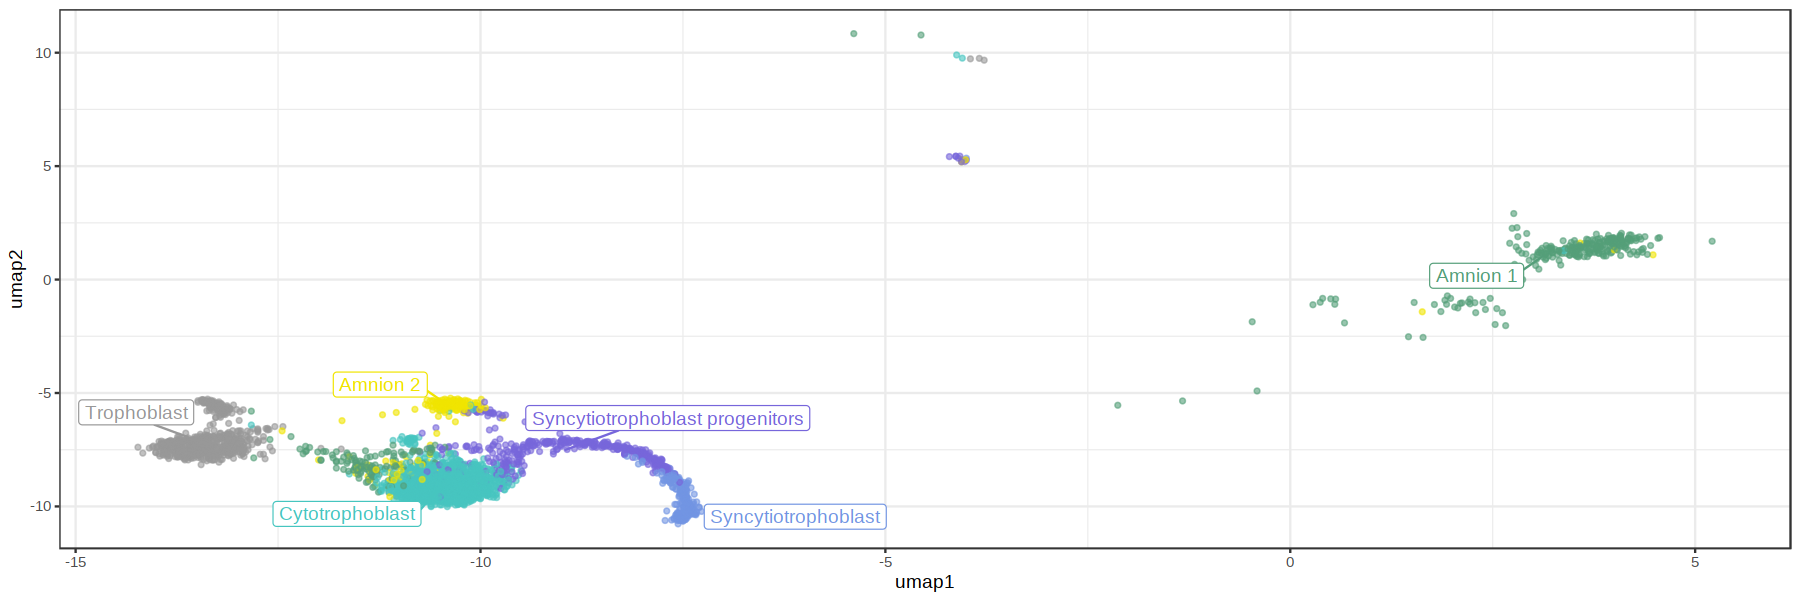

In [4]:
# Plot only trophoblast
to.plot <- umap.dt %>%
  merge(sample_metadata,by="cell")
to.plot = to.plot[Clusters_PeakMatrix %in% paste0('C', 1:5)]
p1 = plot('predictedGroup_celltype_PeakMatrix', save=FALSE) + scale_color_manual(values=opts$celltype_colours)
p1 + theme_bw() + theme(legend.position='none') 

to.plot <- umap.dt %>%
  merge(sample_metadata,by="cell")
to.plot = to.plot[predictedGroup_celltype_PeakMatrix %in% c('Trophoblast', 'Cytotrophoblast','Syncytiotrophoblast progenitors', 'Amnion 1', 'Amnion 2', 'Syncytiotrophoblast')]
p1 = plot('predictedGroup_celltype_PeakMatrix', save=FALSE) + scale_color_manual(values=opts$celltype_colours)
p1 + theme_bw() + theme(legend.position='none')

In [5]:
# Plot only trophoblast
to.plot <- umap.dt %>%
  merge(sample_metadata,by="cell")
#to.plot = to.plot[umap1<=-6 & umap2<=0]
#to.plot = to.plot[Clusters_PeakMatrix %in% paste0('C', 1:5)]
to.plot = to.plot[predictedGroup_celltype_PeakMatrix %in% c('Trophoblast', 'Cytotrophoblast','Syncytiotrophoblast progenitors', 'Amnion 1', 'Amnion 2', 'Syncytiotrophoblast')]
p1 = plot('predictedGroup_celltype_PeakMatrix', save=FALSE) + scale_color_manual(values=opts$celltype_colours)
p2 = plot('stage', save=FALSE)
p3 = plot('Clusters_PeakMatrix', save=FALSE)
p4 = plot('stage_clusters', save=FALSE) 

pdf(sprintf("%s/ATAC_supp_wholeUMAP_trophoblast.pdf",io$sup_figures), width=8, height=4)
    p1
    p2
    p3
    p4
dev.off()

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



png 
  2